# Diabetes Prediction
1. Import necessary libraries
2. Exploratory Data Analysis
3. Data Preprocessing (Scaling with StandardScaler and train test splitting)
4. Model Architecture (Sequential Model, Support Vector Classifier)
5. Train Dataset
6. Evaluate the data( accuracy_score, evaluate, confusion_matrix, roc_curve )
7. Predict

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings('ignore')

#play around by changing last unit to softmax and not sigmoid
#then model.predict and model.predict_classes
#pd.Dataframe(y_test,y_test_pred)

In [2]:
#exploring the data
df = pd.read_csv('/Users/applecare/desktop/diabetes.csv')


df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


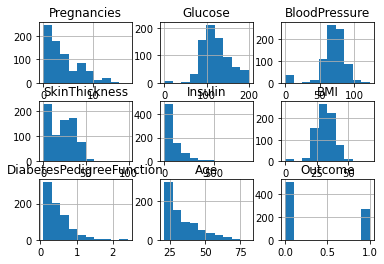

In [3]:
df.hist()
plt.show()

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
pd.DataFrame(df.isna().any())

,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


In [6]:
df.shape

(768, 9)

In [7]:
pd.DataFrame(df.dtypes)

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [8]:
for idx, col in enumerate(df.columns):
    print(idx+1,col)

1 Pregnancies
2 Glucose
3 BloodPressure
4 SkinThickness
5 Insulin
6 BMI
7 DiabetesPedigreeFunction
8 Age
9 Outcome


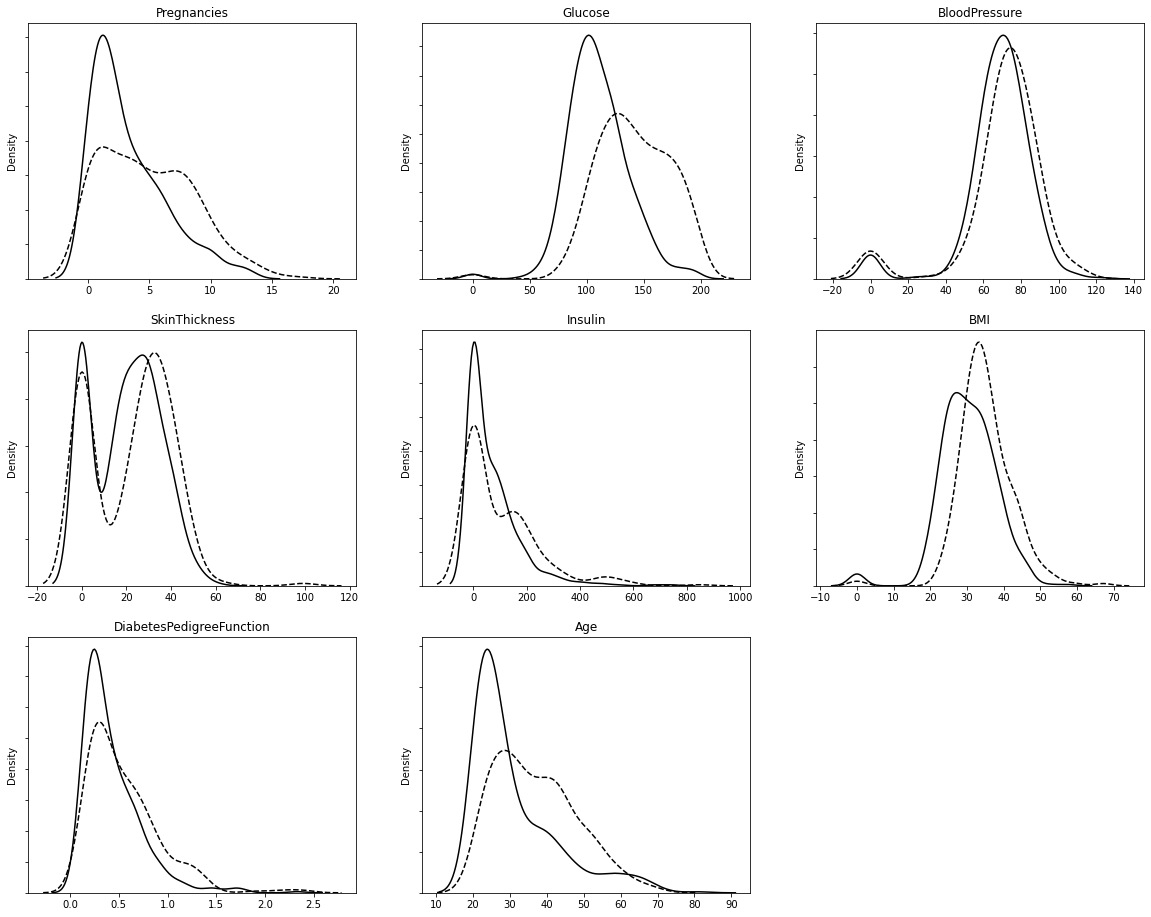

In [9]:
plt.subplots(3,3, figsize=(20,16))

for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3, idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df['Outcome']==0][col],hist=False, axlabel=False, kde_kws={'linestyle':'-',
                                                                            'color':'black',
                                                                            'label':'NoDiabetes'})
    sns.distplot(df.loc[df['Outcome']==1][col],hist=False, axlabel=False, kde_kws={'linestyle':'--',
                                                                            'color':'black',
                                                                            'label':'Diabetes'})
    ax.set_title(col)
     
plt.subplot(3,3,9).set_visible(False)
    
plt.show()




In [10]:
for col in df.columns:
    missing = df.loc[df[col]==0].shape[0]
    print(f'{col}: {missing}')

Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [11]:
df['BMI'] = df['BMI'].replace(0, np.nan)
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)

In [12]:
df.isna().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [13]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

In [14]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [15]:
df.describe().loc['min']

Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
Name: min, dtype: float64

In [16]:
X = df.loc[:, df.columns != 'Outcome']
y = df['Outcome']

In [17]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16629174,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85253118,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33283341,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.91074963,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34311972,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29945588,
        -0.47378505, -0.87137393]])

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, test_size=0.2)


In [19]:
#keras model
model = Sequential()

model.add(Dense(input_dim=8, units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#lets train our model for 200 iterations
model.fit(X_train,y_train, epochs=200)

Epoch 1/200
16/16 [==============================] - 1s 1ms/step - loss: 4.3013 - accuracy: 0.4757
Epoch 2/200
16/16 [==============================] - 0s 1ms/step - loss: 1.3422 - accuracy: 0.5583
Epoch 3/200
16/16 [==============================] - 0s 1ms/step - loss: 1.0712 - accuracy: 0.5677
Epoch 4/200
16/16 [==============================] - 0s 9ms/step - loss: 0.8921 - accuracy: 0.5512
Epoch 5/200
16/16 [==============================] - 0s 2ms/step - loss: 0.8070 - accuracy: 0.6067
Epoch 6/200
16/16 [==============================] - 0s 2ms/step - loss: 0.7861 - accuracy: 0.5827
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.6521
Epoch 8/200
16/16 [==============================] - 0s 3ms/step - loss: 0.7191 - accuracy: 0.6198
Epoch 9/200
16/16 [==============================] - 0s 2ms/step - loss: 0.7669 - accuracy: 0.6511
Epoch 10/200
16/16 [==============================] - 0s 2ms/step - loss: 0.8351 - accuracy: 0.6016
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.7336
Epoch 83/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.7509
Epoch 84/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4886 - accuracy: 0.7391
Epoch 85/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.7328
Epoch 86/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5431 - accuracy: 0.7233
Epoch 87/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.7462
Epoch 88/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.7576
Epoch 89/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.7267
Epoch 90/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4846 - accuracy: 0.7645
Epoch 91/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5304 - accuracy: 0.7353
Epoch 92/200


16/16 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 0.7718
Epoch 164/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.7521
Epoch 165/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5179 - accuracy: 0.7454
Epoch 166/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.7662
Epoch 167/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.7913
Epoch 168/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.7631
Epoch 169/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5512 - accuracy: 0.7098
Epoch 170/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7509
Epoch 171/200
16/16 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.7923
Epoch 172/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 0.7430
Epoc

In [20]:
#support vector machine model
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [21]:
y_train_pred = classifier.predict(X_train)
pd.DataFrame({'Predicted':y_train_pred, 'Actual':y_train})[:10]

,Predicted,Actual
40,1,0
521,0,0
22,1,1
142,0,0
592,0,1
722,0,1
381,0,0
114,1,1
362,0,0
520,0,0


In [22]:
#evaluation on svm model
y_test_predicte = classifier.predict(X_test)
acc_score = accuracy_score(y_test, y_test_predicte)
acc_score

0.7597402597402597

In [23]:
#evaluating  

accuracy_score = model.evaluate(X_test, y_test)
print('score: %.2f%%' %(accuracy_score[1]*100))

5/5 [==============================] - 0s 4ms/step - loss: 0.7630 - accuracy: 0.6948
score: 69.48%


<AxesSubplot:>

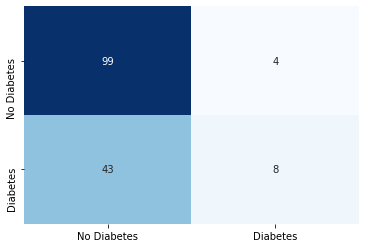

In [24]:
#evaluating using Sequential model
y_test_prediction = model.predict_classes(X_test)
conf_matrix = confusion_matrix(y_test,y_test_prediction)
sns.heatmap(conf_matrix, cmap ='Blues',annot=True, cbar=False, xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes','Diabetes'])


In [25]:
conf_matrix

array([[99,  4],
       [43,  8]])

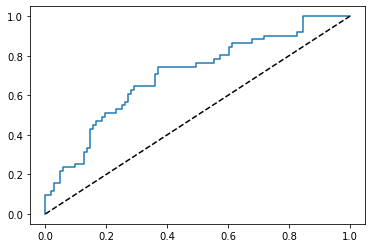

In [26]:
y_test_predict = model.predict(X_test)
tpr,fpr,_, = roc_curve(y_test,y_test_predict)

plt.plot(tpr,fpr)
plt.plot([0,1],[0,1],'--',color='black')


plt.show()

In [27]:
y_train_prediction = model.predict_classes(X_train).reshape(-1,)
pd.DataFrame({'Predicted':y_train_prediction, 'Actual':y_train})[:10]

,Predicted,Actual
40,0,0
521,0,0
22,1,1
142,0,0
592,0,1
722,1,1
381,0,0
114,1,1
362,0,0
520,0,0


In [28]:
X = np.array([10,101,76,48,180,32.9,0.171,63])
X

array([1.00e+01, 1.01e+02, 7.60e+01, 4.80e+01, 1.80e+02, 3.29e+01,
       1.71e-01, 6.30e+01])